In [1]:
import numpy as np 
import pandas as pd 
from glob import glob 
import os 
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

annot_csv=Path("D:/OAK_D_img/oak-d-camera/bbox_package/week5/week5.csv")#D:/00_NCSU/00_Resources/00_Datasets/PartTimePSA/OPENCV/annotations/week4/week4.csv")
data_dir=Path("D:/OAK_D_img/oak-d-camera/weeks/week5/")
RGB_IMAGE_SIZE = (1080,1920)
DEPTH_IMAGE_SIZE = (720,1280)

resize_RGB = (512,910)
resize_depth = (599,1065)

In [2]:
df=pd.read_csv(annot_csv, header=0, names=['no', 'date', 'time', 'week', 'row', 'stop', 'image', 'speciesid', 'commonname', 'pot'], index_col=0)

In [3]:
df['annotation_file']=df['image'].apply(lambda x: os.path.join(annot_csv.parent.absolute(),Path(x.replace('.png', '.txt'))))
print(df['annotation_file'][1])
df['mask_dir']=df['image'].apply(lambda x: os.path.join(annot_csv.parent.absolute(),Path(x.replace('_rgb.png', '_mask.png'))))
print(df['mask_dir'][1])
df['image_file']=df['image'].apply(lambda x: os.path.join(annot_csv.parent.absolute(),Path(x)))
print(df['image_file'][1])

D:\OAK_D_img\oak-d-camera\bbox_package\week5\wk5_row1_stop5_20210421_093212_rgb.txt
D:\OAK_D_img\oak-d-camera\bbox_package\week5\wk5_row1_stop5_20210421_093212_mask.png
D:\OAK_D_img\oak-d-camera\bbox_package\week5\wk5_row1_stop5_20210421_093212_rgb.png


In [4]:
def create_image_path(x):
    #print(Path(x[10]))
    #print(os.path.join(data_dir,Path(x[3].replace('row', '')+'\\'+x[4]+'\\')))
    return os.path.join(data_dir,Path(x[3].replace('row', '')+'\\'+x[4]+'\\'))
def get_disp_map_path(x):
    return sorted(Path(x[12]).rglob('*map30.png'))[-1]
def get_depth_path(x): 
    return sorted(Path(x[12]).rglob('*30.npy'))[-1]



In [5]:
df['image_dir']=df.apply(create_image_path, axis=1)
#print(df['image_dir'])
df['depth_dir']=df.apply(get_depth_path, axis=1)
print(df['depth_dir'][1])
df['disp_map_dir']=df.apply(get_disp_map_path,axis=1)
df['annotations']=df['annotation_file'].apply(lambda x: np.loadtxt(x))



D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop5\2021_04_21_09_32_46\depth30.npy


In [6]:
df.head()

,date,time,week,row,stop,image,speciesid,commonname,pot,annotation_file,mask_dir,image_file,image_dir,depth_dir,disp_map_dir,annotations
no,,,,,,,,,,,,,,,,
0,20210421,92743,wk5,row1,stop1,wk5_row1_stop1_20210421_092743_rgb.png,0,clover,1,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop1,D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop1\...,D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop1\...,"[0.0, 0.458073, 0.493981, 0.191146, 0.339815]"
1,20210421,93212,wk5,row1,stop5,wk5_row1_stop5_20210421_093212_rgb.png,0,clover,2,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop5,D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop5\...,D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop5\...,"[0.0, 0.452083, 0.5, 0.115625, 0.244444]"
2,20210421,93721,wk5,row1,stop9,wk5_row1_stop9_20210421_093721_rgb.png,0,clover,3,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop9,D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop9\...,D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop9\...,"[0.0, 0.466927, 0.464352, 0.221354, 0.475]"
3,20210421,94223,wk5,row1,stop13,wk5_row1_stop13_20210421_094223_rgb.png,0,clover,4,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop13,D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop13...,D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop13...,"[0.0, 0.483854, 0.442593, 0.182292, 0.461111]"
4,20210421,94631,wk5,row1,stop17,wk5_row1_stop17_20210421_094631_rgb.png,0,clover,5,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop17,D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop17...,D:\OAK_D_img\oak-d-camera\weeks\week5\1\stop17...,"[0.0, 0.471094, 0.438426, 0.206771, 0.399074]"


In [7]:
from scipy import ndimage, misc

def open_depth_slices(x): 
    label=x['annotations']
    #H, W=(1080*0.57, 1920*0.57)
    H, W=(1080*0.474, 1920*0.474)
    obj =[int((label[1] - label[3]/2)* W), int((label[2] - label[4] / 2)* H), int((label[1] + label[3] / 2) * W), int((label[2] + label[4]/ 2) * H)]
    x1,y1,x2,y2 = obj
    result = ndimage.zoom(np.load(x['depth_dir']), 0.832)
    #return np.load(x['depth_dir'])[y1+72:y2+72,x1+119:x2+119]
    return result[y1+60:y2+60,x1+115:x2+115]


def open_masks(x):
    H, W=(1080*0.474, 1920*0.474)
    m = cv2.cvtColor(cv2.imread(x['mask_dir']),cv2.COLOR_BGR2GRAY)
    label = x['annotations']
    width = int(m.shape[1] *0.474)
    height = int(m.shape[0] *0.474)
    dsize = (width, height)
    output = cv2.resize(m, dsize)
    obj =[int((label[1] - label[3]/2)* W), int((label[2] - label[4] / 2)* H), int((label[1] + label[3] / 2) * W), int((label[2] + label[4]/ 2) * H)]
    x1,y1,x2,y2 = obj
    return output[y1:y2,x1:x2]

def open_dispmaps(x):
    label=x['annotations']
    H, W=(1080*0.474, 1920*0.474)
    dsize = (round(1280*0.832), round(720*0.832))
    obj =[int((label[1] - label[3]/2)* W), int((label[2] - label[4] / 2)* H), int((label[1] + label[3] / 2) * W), int((label[2] + label[4]/ 2) * H)]
    x1,y1,x2,y2 = obj
    dmap=cv2.imread(str(x['disp_map_dir']))
    dmap=cv2.resize(dmap,dsize)
    #return dmap[y1+60:y2+60,x1+115:x2+115]
    return dmap[y1+60:y2+60,x1+115:x2+115]


def open_rgb(x):
    H, W=(1080*0.474, 1920*0.474)
    m = cv2.cvtColor(cv2.imread(x['image_file']),cv2.COLOR_BGR2RGB)
    label = x['annotations']
    width = int(m.shape[1] *0.474)
    height = int(m.shape[0] *0.474)
    dsize = (width, height)
    output = cv2.resize(m, dsize)
    obj =[int((label[1] - label[3]/2)* W), int((label[2] - label[4] / 2)* H), int((label[1] + label[3] / 2) * W), int((label[2] + label[4]/ 2) * H)]
    x1,y1,x2,y2 = obj
    return output[y1:y2,x1:x2]



def create_histograms(x):
    #return np.histogram(x['depth_slices'],list(range(0,65535,50)))
    return np.histogram(x['depth_slices'],list(range(0,65535,50)))

def create_histograms_maps(x):
    #return np.histogram(x['depth_slices'],list(range(0,65535,50)))
    return np.histogram(x['disp_maps'],list(range(0,255,1)))

In [8]:
df['depth_slices']=df.apply(open_depth_slices, axis=1)
df['mask']=df.apply(open_masks, axis=1)
df['disp_maps']=df.apply(open_dispmaps, axis=1)
df['histograms']=df.apply(create_histograms, axis=1)
df['histograms_map']=df.apply(create_histograms_maps, axis=1)
df['origin'] =df.apply(open_rgb, axis=1) 


In [9]:
test_img=7
df['mask'][test_img].shape, df['depth_slices'][test_img].shape, df['disp_maps'][test_img].shape, df['origin'][test_img].shape

((155, 139), (155, 139), (155, 139, 3), (155, 139, 3))

In [10]:
df['disp_maps'][test_img].max()

255

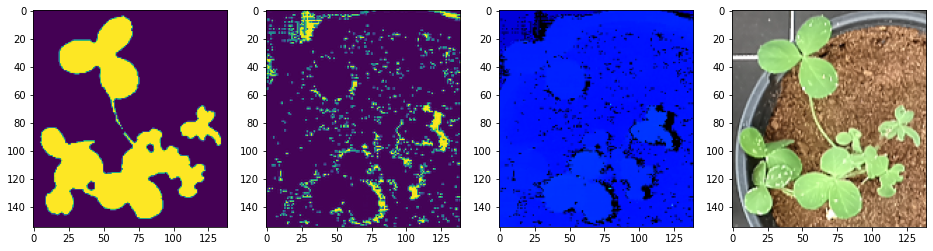

In [11]:
plt.figure(figsize=(16,16)); 
plt.subplot(141);plt.imshow(df['mask'][test_img]); 
plt.subplot(142); plt.imshow(df['depth_slices'][test_img]); 
plt.subplot(143); plt.imshow(df['disp_maps'][test_img])
plt.subplot(144); plt.imshow(df['origin'][test_img])


In [12]:
import imageio
from pathlib import Path
import pandas as pd
import sys
import cv2
import numpy as np



###VI funtions
def make_exg(x):
    # rgb_img: np array in [RGB] channel order
    # EXG = 2 * G - R - B
    img = x['origin']#.astype(float)
    width = int(img.shape[1])
    height = int(img.shape[0])
    dsize = (width, height)
    mask = cv2.resize(x['mask'], dsize)
    img[:, :, 0:2][mask==0] = 0
    blue = img[:,:,2]
    green = img[:,:,1]
    red = img[:,:,0]
    exg = 2*green - red - blue
    exg = np.where(exg < 0, 0, exg).astype('uint8') # Thresholding removes low negative values (noise)
    return exg


def make_ndi(x):
    # rgb_img: np array in [RGB] channel order
    # NDI = 128 * (((G - R) / (G + R)) + 1)
    img = x['origin']#.astype(float)
    width = int(img.shape[1])
    height = int(img.shape[0])
    dsize = (width, height)
    mask = cv2.resize(x['mask'], dsize)
    img[:, :, 0:2][mask==0] = 0
    blue = img[:,:,2]
    green = img[:,:,1]
    red = img[:,:,0]
    gminr = (green - red)
    gplusr = (green + red)
    gdivr = np.true_divide(gminr, gplusr, where=gplusr!=0) # /, out=np.zeros_like(gminr),
    ndi = 128 * (gdivr  + 1)
    return ndi


def make_exr(x):
    # rgb_img: np array in [RGB] channel order
    # EXR = 1.4 * R - G
    img = x['origin']#.astype(float)
    width = int(img.shape[1])
    height = int(img.shape[0])
    dsize = (width, height)
    mask = cv2.resize(x['mask'], dsize)
    img[:, :, 0:2][mask==0] = 0
    blue = img[:,:,2]
    green = img[:,:,1]
    red = img[:,:,0]
    exr = 1.4 * red - green
    exr = np.where(exr < 0, 0, exr).astype('uint8') # Thresholding removes low negative values
    return exr


def exg_minus_exr(x):
    exg = make_exg(x)
    exr = make_exr(x)

    exgr = exg - exr
    exgr = np.where(exgr < 25, 0, exgr).astype('uint8')
    return exgr


In [13]:
df['exg']=df.apply(make_exg, axis=1)
df['exr']=df.apply(make_exr, axis=1)
df['ndi']=df.apply(make_ndi, axis=1)
df['exg-exr']=df.apply(exg_minus_exr, axis=1)


d:\intel\openvino_notebooks\openvino_env\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in add
d:\intel\openvino_notebooks\openvino_env\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in multiply


In [14]:
def area(x):
    binary = x['mask'].astype(int) #x['mask']
    return binary
df['area']=df.apply(area, axis=1)

In [15]:
df['exg'][test_img].shape, df['exr'][test_img].shape, df['ndi'][test_img].shape, df['exg-exr'][test_img].shape, df['area'][test_img].shape, df['mask'][test_img].shape

((155, 139), (155, 139), (155, 139), (155, 139), (155, 139), (155, 139))

Text(0.5, 1.0, 'Area')

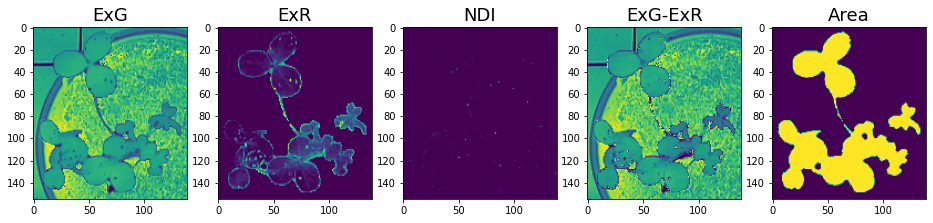

In [16]:
plt.figure(figsize=(16,16)); 
plt.subplot(151); plt.imshow(df['exg'][test_img]); plt.title('ExG',fontsize=18)
plt.subplot(152); plt.imshow(df['exr'][test_img]); plt.title('ExR',fontsize=18) 
plt.subplot(153); plt.imshow(df['ndi'][test_img]); plt.title('NDI',fontsize=18)
plt.subplot(154); plt.imshow(df['exg-exr'][test_img]); plt.title('ExG-ExR',fontsize=18)
plt.subplot(155); plt.imshow(df['area'][test_img]); plt.title('Area',fontsize=18)

In [17]:
print(df['exg'][test_img].shape)
print(df['exr'][test_img].shape)
print(df['ndi'][test_img].shape)
print(df['exg-exr'][test_img].shape)
print(df['mask'][test_img].shape)
print(df['origin'][test_img].shape)

(155, 139)
(155, 139)
(155, 139)
(155, 139)
(155, 139)
(155, 139, 3)


In [18]:
import imageio
from pathlib import Path
import pandas as pd
import sys
import cv2
import numpy as np

def get_VI(x):
    
    all_exg = []
    all_exr = []
    all_ndi = []
    all_exg_exr = []
    all_sumbinary = []
    all_image = []
    
    # Load images
    frgd = x['origin']
    mask = x['mask']
    exg = x['exg']
    exr = x['exr']
    ndi = x['ndi']
    exg_exr = x['exg-exr']
    
    # binary = np.where(mask > 100, 1, 0)
    binary = mask.astype(int)
    # Remove alpha layer and use mask to remape zero values
    frgd[:, :, 0:3][mask==0] = 0
    frgd = frgd[:,:,0:3]
    
    exg[mask==0] =0
    exr[mask==0] =0
    ndi[mask==0] =0
    exg_exr[mask==0] =0
    
    #exg[:, :][mask==0] = 0
    #exg = exg[:,:]
    #exr[:, :][mask==0] = 0
    #exr = exr[:,:]
    #ndi[:, :][mask==0] = 0
    #ndi = ndi[:,:]
    #exg_exr[:, :][mask==0] = 0
    #exg_exr = exg_exr[:,:]
    # Get sum of VIs of masked ROI
    all_exg=exg.sum()
    all_exr=exr.sum()
    all_ndi=ndi.sum()
    all_exg_exr=exg_exr.sum()
    all_sumbinary=binary.sum()
    #Get mean and std per VI
    m_exg, sd_exg = cv2.meanStdDev(exg)
    m_exr, sd_exr = cv2.meanStdDev(exr)
    m_ndi, sd_ndi = cv2.meanStdDev(ndi)
    m_exg_exr, sd_exg_exr = cv2.meanStdDev(exg_exr)
    print("Vector of features")
    print(all_exg, m_exg[0][0], sd_exg[0][0], all_exr, m_exr[0][0], sd_exr[0][0], all_ndi, m_ndi[0][0], sd_ndi[0][0], all_exg_exr, m_exg_exr[0][0], sd_exg_exr[0][0], all_sumbinary)
    stat_vector = np.array([all_exg, m_exg[0][0], sd_exg[0][0], all_exr, m_exr[0][0], sd_exr[0][0], all_ndi, m_ndi[0][0], sd_ndi[0][0], all_exg_exr, m_exg_exr[0][0], sd_exg_exr[0][0], all_sumbinary])
    #print(stat_vector)
    
    return stat_vector

df['stats']= df.apply(get_VI, axis=1)
#print(df['stats'][test_img])


Vector of features
470985 15.556381292112565 41.07783004480075 83814 2.7683313515655965 11.005717229484139 1069733.200457222 35.33271239454409 258.74528758046824 465041 15.36005416831814 43.37568894418833 1001555
Vector of features
502777 37.945433962264154 62.64487001765315 58700 4.430188679245283 12.129589345903232 829897.4608437404 62.6337706297157 420.49715889411516 473887 35.76505660377359 61.74772388820624 922510
Vector of features
1393897 28.53831664721659 57.03508590784427 165767 3.3938742501484347 11.629811527605764 2115473.8334175306 43.31170962916972 186.0058027943038 1349149 27.622156706181027 56.991930773129965 2523115
Vector of features
1746626 44.58408209107617 66.99461860198384 89818 2.292679191341638 9.9507134155218 3223554.0437530167 82.28389942191689 346.4879013381453 1734448 44.273228507249335 68.07517057141317 3111267
Vector of features
2192445 57.166379849812266 72.09101069309428 85945 2.240952231956612 9.24681890133739 4366286.489858623 113.84768694875466 303.568

In [19]:
df.head()

,date,time,week,row,stop,image,speciesid,commonname,pot,annotation_file,...,disp_maps,histograms,histograms_map,origin,exg,exr,ndi,exg-exr,area,stats
no,,,,,,,,,,,,,,,,,,,,,
0,20210421,92743,wk5,row1,stop1,wk5_row1_stop1_20210421_092743_rgb.png,0,clover,1,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"[[[0, 0, 219], [0, 0, 219], [0, 0, 218], [0, 0...","([3824, 156, 186, 174, 207, 262, 331, 360, 456...","([32673, 140, 140, 143, 161, 154, 211, 287, 10...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[470985.0, 15.556381292112565, 41.077830044800..."
1,20210421,93212,wk5,row1,stop5,wk5_row1_stop5_20210421_093212_rgb.png,0,clover,2,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"[[[0, 16, 255], [0, 14, 255], [0, 15, 255], [0...","([2054, 101, 82, 79, 112, 114, 167, 176, 205, ...","([13578, 84, 87, 70, 73, 89, 120, 103, 150, 18...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[502777.0, 37.945433962264154, 62.644870017653..."
2,20210421,93721,wk5,row1,stop9,wk5_row1_stop9_20210421_093721_rgb.png,0,clover,3,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"[[[0, 0, 115], [0, 0, 208], [0, 0, 220], [0, 0...","([5227, 203, 208, 227, 249, 298, 367, 428, 541...","([60213, 190, 224, 218, 171, 203, 167, 200, 21...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1393897.0, 28.53831664721659, 57.035085907844..."
3,20210421,94223,wk5,row1,stop13,wk5_row1_stop13_20210421_094223_rgb.png,0,clover,4,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"[[[0, 0, 220], [0, 0, 219], [0, 0, 220], [0, 0...","([5107, 175, 194, 227, 242, 294, 305, 355, 505...","([51043, 194, 167, 155, 145, 138, 156, 139, 15...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1746626.0, 44.58408209107617, 66.994618601983..."
4,20210421,94631,wk5,row1,stop17,wk5_row1_stop17_20210421_094631_rgb.png,0,clover,5,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"[[[0, 0, 226], [0, 0, 225], [0, 0, 234], [0, 0...","([3741, 176, 181, 192, 262, 278, 274, 322, 500...","([46781, 184, 119, 127, 130, 122, 120, 114, 11...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2192445.0, 57.166379849812266, 72.09101069309..."


In [20]:
df.to_hdf('depth_slices_wk5_v2.h5', key='df')

d:\intel\openvino_notebooks\openvino_env\lib\site-packages\pandas\core\generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['week', 'row', 'stop', 'image', 'commonname', 'annotation_file',
       'mask_dir', 'image_file', 'image_dir', 'depth_dir', 'disp_map_dir',
       'annotations', 'depth_slices', 'mask', 'disp_maps', 'histograms',
       'histograms_map', 'origin', 'exg', 'exr', 'ndi', 'exg-exr', 'area',
       'stats'],
      dtype='object')]

  encoding=encoding,


In [21]:
pd.read_hdf('depth_slices_wk5_v2.h5')

,date,time,week,row,stop,image,speciesid,commonname,pot,annotation_file,...,disp_maps,histograms,histograms_map,origin,exg,exr,ndi,exg-exr,area,stats
no,,,,,,,,,,,,,,,,,,,,,
0,20210421,92743,wk5,row1,stop1,wk5_row1_stop1_20210421_092743_rgb.png,0,clover,1,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"[[[0, 0, 219], [0, 0, 219], [0, 0, 218], [0, 0...","([3824, 156, 186, 174, 207, 262, 331, 360, 456...","([32673, 140, 140, 143, 161, 154, 211, 287, 10...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[470985.0, 15.556381292112565, 41.077830044800..."
1,20210421,93212,wk5,row1,stop5,wk5_row1_stop5_20210421_093212_rgb.png,0,clover,2,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"[[[0, 16, 255], [0, 14, 255], [0, 15, 255], [0...","([2054, 101, 82, 79, 112, 114, 167, 176, 205, ...","([13578, 84, 87, 70, 73, 89, 120, 103, 150, 18...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[502777.0, 37.945433962264154, 62.644870017653..."
2,20210421,93721,wk5,row1,stop9,wk5_row1_stop9_20210421_093721_rgb.png,0,clover,3,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"[[[0, 0, 115], [0, 0, 208], [0, 0, 220], [0, 0...","([5227, 203, 208, 227, 249, 298, 367, 428, 541...","([60213, 190, 224, 218, 171, 203, 167, 200, 21...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1393897.0, 28.53831664721659, 57.035085907844..."
3,20210421,94223,wk5,row1,stop13,wk5_row1_stop13_20210421_094223_rgb.png,0,clover,4,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"[[[0, 0, 220], [0, 0, 219], [0, 0, 220], [0, 0...","([5107, 175, 194, 227, 242, 294, 305, 355, 505...","([51043, 194, 167, 155, 145, 138, 156, 139, 15...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1746626.0, 44.58408209107617, 66.994618601983..."
4,20210421,94631,wk5,row1,stop17,wk5_row1_stop17_20210421_094631_rgb.png,0,clover,5,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"[[[0, 0, 226], [0, 0, 225], [0, 0, 234], [0, 0...","([3741, 176, 181, 192, 262, 278, 274, 322, 500...","([46781, 184, 119, 127, 130, 122, 120, 114, 11...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2192445.0, 57.166379849812266, 72.09101069309..."
5,20210421,95248,wk5,row2,stop1,wk5_row2_stop1_20210421_095248_rgb.png,0,clover,1,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"[[[0, 11, 255], [0, 10, 255], [0, 12, 255], [0...","([1350, 67, 85, 65, 84, 104, 133, 165, 166, 21...","([12540, 53, 45, 53, 83, 113, 296, 372, 1729, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [22]:
import xlrd
location = "D:/Intel/openvino_notebooks/notebooks/501-depth-oakd/Oak-D2020 Biomass Datasheet.xls"
wb = xlrd.open_workbook(location)
sheet = wb.sheet_by_index(4)

In [23]:
df1=pd.read_excel("D:/Intel/openvino_notebooks/notebooks/501-depth-oakd/Oak-D2020 Biomass Datasheet.xls", 4)
print(df1)

    4  22  21   1  1.1   row1   stop1  0.117
0   4  22  21   1    2   row1   stop5  0.112
1   4  22  21   1    3   row1   stop9  0.430
2   4  22  21   1    4   row1  stop13  0.087
3   4  22  21   1    5   row1  stop17  0.245
4   4  22  21   2    1   row2   stop1  0.166
5   4  22  21   2    2   row2   stop5  0.527
6   4  22  21   2    3   row2   stop9  0.480
7   4  22  21   2    4   row2  stop13  0.674
8   4  22  21   2    5   row2  stop17  0.258
9   4  22  21   3    1   row3   stop1  0.064
10  4  22  21   3    2   row3   stop5  0.266
11  4  22  21   3    3   row3   stop9  0.296
12  4  22  21   3    4   row3  stop13  0.174
13  4  22  21   3    5   row3  stop17  0.156
14  4  22  21   4    1   row4     NaN    NaN
15  4  22  21   4    2   row4   stop5  0.308
16  4  22  21   4    3   row4  stop13  0.300
17  4  22  21   4    4   row4  stop17  1.012
18  4  22  21   4    5   row4     NaN    NaN
19  4  22  21   5    1   row5   stop1  0.866
20  4  22  21   5    2   row5   stop4  0.734
21  4  22 

In [24]:
xl = pd.ExcelFile("D:/Intel/openvino_notebooks/notebooks/501-depth-oakd/Oak-D2020 Biomass Datasheet.xls")
df2 = xl.parse("wk5", header=None, names=['Month', 'Day', 'Year', 'row1', 'pot', 'row', 'stop', 'biomass'])

In [25]:
df2.head()

,Month,Day,Year,row1,pot,row,stop,biomass
0,4,22,21,1,1,row1,stop1,0.117
1,4,22,21,1,2,row1,stop5,0.112
2,4,22,21,1,3,row1,stop9,0.430
3,4,22,21,1,4,row1,stop13,0.087
4,4,22,21,1,5,row1,stop17,0.245


In [26]:
for i in range(len(df)) :
    #print(df.loc[i, "row"], df.loc[i, "stop"])
    #df.loc[i, "Biomass"] = #pd.notnull
    try: 
        #print(pd.notnull(df2['biomass'].where((df2['row'] == df.loc[i, "row"]) & (df2['stop'] == df.loc[i, "stop"]))))
        df3=pd.notnull(df2['biomass'].where((df2['row'] == df.loc[i, "row"]) & (df2['stop'] == df.loc[i, "stop"])))
        #print(df3[df3 == True].index[0])
        df.loc[i, "Biomass"]=df2['biomass'][df3[df3 == True].index[0]]
    except:
        df.loc[i, "Biomass"]=None
        print("no biomass data")  

df.head()

no biomass data
no biomass data
no biomass data
no biomass data
no biomass data
no biomass data
no biomass data
no biomass data
no biomass data
no biomass data
no biomass data
no biomass data
no biomass data
no biomass data


,date,time,week,row,stop,image,speciesid,commonname,pot,annotation_file,...,histograms,histograms_map,origin,exg,exr,ndi,exg-exr,area,stats,Biomass
no,,,,,,,,,,,,,,,,,,,,,
0,20210421,92743,wk5,row1,stop1,wk5_row1_stop1_20210421_092743_rgb.png,0,clover,1,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"([3824, 156, 186, 174, 207, 262, 331, 360, 456...","([32673, 140, 140, 143, 161, 154, 211, 287, 10...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[470985.0, 15.556381292112565, 41.077830044800...",0.117
1,20210421,93212,wk5,row1,stop5,wk5_row1_stop5_20210421_093212_rgb.png,0,clover,2,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"([2054, 101, 82, 79, 112, 114, 167, 176, 205, ...","([13578, 84, 87, 70, 73, 89, 120, 103, 150, 18...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[502777.0, 37.945433962264154, 62.644870017653...",0.112
2,20210421,93721,wk5,row1,stop9,wk5_row1_stop9_20210421_093721_rgb.png,0,clover,3,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"([5227, 203, 208, 227, 249, 298, 367, 428, 541...","([60213, 190, 224, 218, 171, 203, 167, 200, 21...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1393897.0, 28.53831664721659, 57.035085907844...",0.430
3,20210421,94223,wk5,row1,stop13,wk5_row1_stop13_20210421_094223_rgb.png,0,clover,4,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"([5107, 175, 194, 227, 242, 294, 305, 355, 505...","([51043, 194, 167, 155, 145, 138, 156, 139, 15...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1746626.0, 44.58408209107617, 66.994618601983...",0.087
4,20210421,94631,wk5,row1,stop17,wk5_row1_stop17_20210421_094631_rgb.png,0,clover,5,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"([3741, 176, 181, 192, 262, 278, 274, 322, 500...","([46781, 184, 119, 127, 130, 122, 120, 114, 11...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2192445.0, 57.166379849812266, 72.09101069309...",0.245


In [27]:
df.to_hdf('depth_slices_wk5_v2.h5', key='df')

d:\intel\openvino_notebooks\openvino_env\lib\site-packages\pandas\core\generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['week', 'row', 'stop', 'image', 'commonname', 'annotation_file',
       'mask_dir', 'image_file', 'image_dir', 'depth_dir', 'disp_map_dir',
       'annotations', 'depth_slices', 'mask', 'disp_maps', 'histograms',
       'histograms_map', 'origin', 'exg', 'exr', 'ndi', 'exg-exr', 'area',
       'stats'],
      dtype='object')]

  encoding=encoding,
